<img align="left" src="https://github.com/GarethSequeira/Superhero-Analysis/blob/main/SuperheroAnalysis/Images/SuperheroRect.png?raw=true" width="100%">  

<br><br>


# 🦹🏻‍♂️ Superhero Analysis 🦸🏻‍♂️

#### In this notebook, visualization on various properties, common to some superheroes and how they relate to each other is done.  

#### These Superheroes are segregated into these categories containing thier characteristics:  

   a. **🐺 Animal Attributes**  
    
   b. **💪🏻 Power of Strength**  
    
   c. **⚡ Super Speed**
    
   d. **👀 Vision Related Powers**  

#### Information of these superheroes is analysed and extracted through which thier characteristics and features are visualized. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
plt.style.use('seaborn-bright')

import seaborn as sns
sns.set_style("whitegrid")
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
np.random.seed(42)

%matplotlib inline

#### Read the Data

In [2]:
heroes_info = pd.read_csv("SuperheroInfo.csv")
heroes_info.drop(heroes_info.columns[0], axis=1, inplace=True)
heroes_info = heroes_info.rename(columns={'name':'hero_names'})

heroes_powers = pd.read_csv("SuperheroAbility.csv")
heroes_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
660,X-Man,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
158,Claire Bennet,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,Venompool,True,True,False,True,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
235,Firestar,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
635,Vertigo II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<br>

--------

<br>

## Visualizing Dataframes

#### Correlation Heatmap 

A Correlation Heatmap based on Correlation Matrix [ `df.corr()`] has been used to identify properties.  

Since the number of 'powers' are fairly large, not much information can be interpreted from such a figure.

<AxesSubplot:>

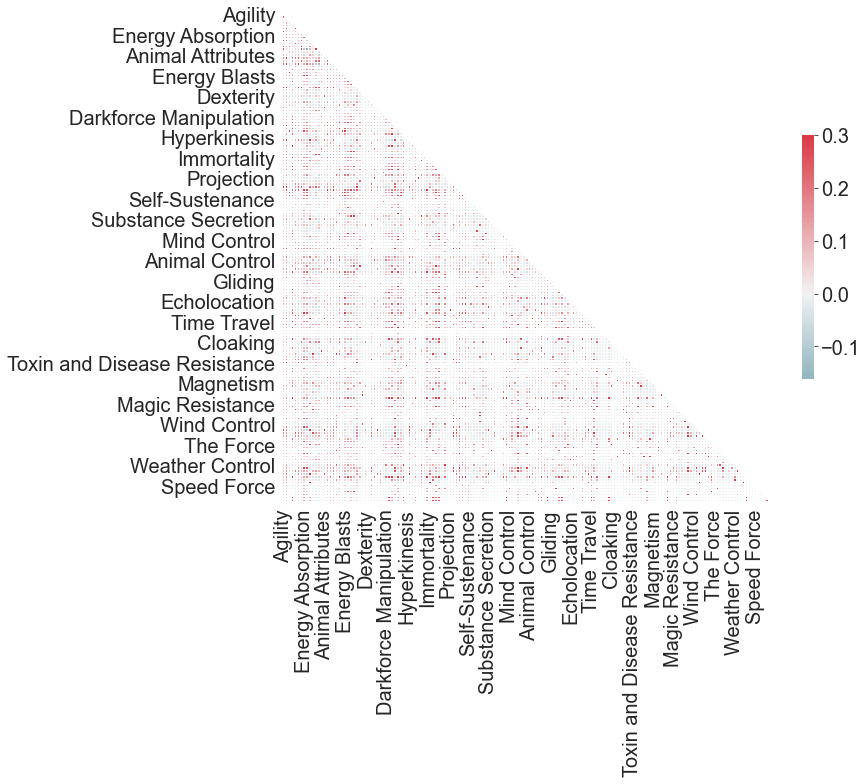

In [3]:
corr = heroes_powers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Extraction

Extracting **powers**

To find abilities of superheroes that belong together, property pairs are extracted and merged where correlation value is greater than **0.4** and are then categorized accordingly.

As we can observe below:
Agiity related skills are clubbed together, similar with powers like Telepathy, Element Control, etc.

In [4]:
powers = heroes_powers.corr().columns.values
for col, row in ((heroes_powers.corr().abs() > 0.4) & (heroes_powers.corr().abs() < 1)).iteritems():
    if (len(powers[row.values])>0):
        print(col, powers[row.values]) 

Agility ['Stamina' 'Reflexes']
Lantern Power Ring ['Energy Armor']
Dimensional Awareness ['Teleportation' 'Astral Projection' 'Time Manipulation' 'Reality Warping']
Cold Resistance ['Heat Resistance']
Durability ['Super Strength']
Stealth ['Marksmanship' 'Weapons Master']
Danger Sense ['Wallcrawling' 'Web Creation' 'Symbiote Costume']
Underwater breathing ['Water Control' 'Sub-Mariner']
Marksmanship ['Stealth' 'Weapons Master']
Weapons Master ['Stealth' 'Marksmanship']
Animal Attributes ['Animal Oriented Powers']
Super Strength ['Durability']
Telepathy ['Telekinesis' 'Astral Projection']
Energy Armor ['Lantern Power Ring']
Energy Blasts ['Force Fields']
Stamina ['Agility' 'Reflexes']
Audio Control ['Sonic Scream']
Animal Oriented Powers ['Animal Attributes']
Teleportation ['Dimensional Awareness']
Telekinesis ['Telepathy' 'Astral Projection' 'Illusions']
Power Sense ['Projection']
Element Control ['Omnipresent' 'Omniscient']
Phasing ['Time Travel' 'Invisibility']
Astral Projection ['Di

In [5]:
powers_cat = {
    'Animal Attributes':['hero_names','Animal Attributes','Animal Oriented Powers',
                         'Danger Sense','Web Creation','Wallcrawling'],
    
    'Strength':['hero_names','Durability','Super Strength','Super Speed','Stamina','Reflexes',
               'Energy Armor','Force Fields'],
    
    'Super Speed':['hero_names','Super Speed','Time Travel','Time Manipulation',
                   'Reality Warping','Phasing'],
    
    'Vision':['hero_names','Vision - X-Ray','Vision - Telescopic',
              'Vision - Microscopic', 'Vision - Night','Vision - Heat']    
}

#### Let us now see how all the superheroes seperated by thier abilities look like in thier respective categories:

## Data Analysis
### Creating separate tables for each category:
<br><br>
  
### • 🐺Animal Attributes

In [6]:
animalattributes = heroes_powers[(heroes_powers[powers_cat['Animal Attributes']] == True).any(axis=1)][powers_cat['Animal Attributes']]

#animalattributes.sample(5)                        # For a RANDOM Smaple of the Dataframe Output Everytime
animalattributes.sample(n=5,random_state=5)        # Produces SAME Dataframe Sequence of Output Everytime

,hero_names,Animal Attributes,Animal Oriented Powers,Danger Sense,Web Creation,Wallcrawling
389,Man-Bat,True,True,False,False,False
78,Bird-Brain,True,False,False,False,False
200,Doctor Octopus,False,False,False,False,True
518,Rocket Raccoon,True,True,False,False,False
183,Darth Vader,False,False,True,False,False


### • 💪🏻 Power of Strength 

In [7]:
strength = heroes_powers[(heroes_powers[powers_cat['Strength']] == True).any(axis=1)][powers_cat['Strength']]

#strength.sample(5)                                # For a RANDOM Smaple of the Dataframe Output Everytime
strength.sample(n=5,random_state=5)                # Produces SAME Dataframe Sequence of Output Everytime

,hero_names,Durability,Super Strength,Super Speed,Stamina,Reflexes,Energy Armor,Force Fields
374,Loki,True,True,False,True,False,False,False
180,Darkseid,False,True,False,True,True,False,True
296,Hulk,True,True,False,True,True,False,False
143,Captain Universe,False,False,True,False,False,False,False
624,Ultragirl,True,True,False,True,True,False,False


### • ⚡ Super Speed

In [8]:
superspeed = heroes_powers[(heroes_powers[powers_cat['Super Speed']] == True).any(axis=1)][powers_cat['Super Speed']]

#superspeed.sample(5)                              # For a RANDOM Smaple of the Dataframe Output Everytime
superspeed.sample(n=5,random_state=5)              # Produces SAME Dataframe Sequence of Output Everytime

,hero_names,Super Speed,Time Travel,Time Manipulation,Reality Warping,Phasing
354,Krypto,True,False,False,False,False
608,Thunderbird III,True,False,False,False,False
535,Sentry,True,False,False,False,False
152,Cheetah,True,False,False,False,False
478,Professor Zoom,True,True,False,False,True


### • 👀 Vision Related Powers

In [9]:
vision = heroes_powers[(heroes_powers[powers_cat['Vision']] == True).any(axis=1)][powers_cat['Vision']]

#vision.sample(5)                                  # For a RANDOM Smaple of the Dataframe Output Everytime
vision.sample(n=5,random_state=5)                  # Produces SAME Dataframe Sequence of Output Everytime

,hero_names,Vision - X-Ray,Vision - Telescopic,Vision - Microscopic,Vision - Night,Vision - Heat
354,Krypto,True,True,True,False,True
589,Superman,True,True,True,False,True
282,Hawkgirl,False,True,False,False,False
655,Wolverine,False,True,False,True,False
84,Bizarro-Girl,False,True,True,False,False


In [10]:
print (animalattributes.shape, strength.shape, superspeed.shape, vision.shape)

(83, 6) (501, 8) (150, 6) (67, 6)


In [11]:
animalattributes_heroes = set(list(animalattributes.hero_names))
strength_heroes = set(list(strength.hero_names))
superspeed_heroes = set(list(superspeed.hero_names))
vision_heroes = set(list(vision.hero_names))

-----

## Finding Heroes with Overlapping Skillsets

Expected here is substantial overlap between various superheroes in context of their abilities. 

Some interesting observations to note here are - 

- **Strength** overlaps with almost all superpowers apart from **Super Speed**.
- The Rest, namely **Animal Attributes, Vision & Super Speed** are fairly independent with little overlap.

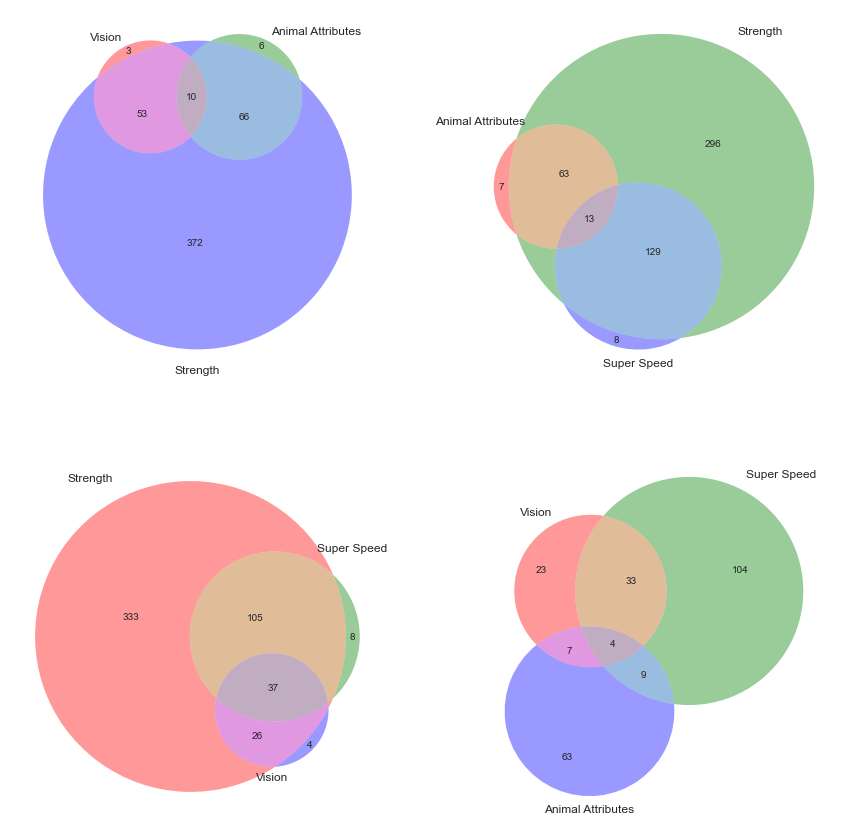

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
venn3([vision_heroes, animalattributes_heroes, strength_heroes],  
      ('Vision', 'Animal Attributes', 'Strength'), ax = ax[0][0])

venn3([animalattributes_heroes, strength_heroes, superspeed_heroes], 
      ('Animal Attributes', 'Strength', 'Super Speed'), ax = ax[0][1])

venn3([strength_heroes, superspeed_heroes, vision_heroes], 
      ('Strength', 'Super Speed', 'Vision'), ax = ax[1][0])

venn3([vision_heroes, superspeed_heroes, animalattributes_heroes], 
      ('Vision', 'Super Speed', 'Animal Attributes'), ax = ax[1][1])

#### Merging the Dataframes
After the `merge` operation, value of weight had to be set to the lower limit to 0 instead of -99 in some cases.

In [13]:
animalattributes_hero_prop = pd.merge(heroes_info, animalattributes, on='hero_names')
animalattributes_hero_prop.replace([-99, np.NaN],0, inplace=True)

strength_hero_prop = pd.merge(heroes_info, strength, on='hero_names')
strength_hero_prop.replace(-99,0, inplace=True)

superspeed_hero_prop = pd.merge(heroes_info, superspeed, on='hero_names')
superspeed_hero_prop.replace(-99,0, inplace=True)

vision_hero_prop = pd.merge(heroes_info, vision, on='hero_names')
vision_hero_prop.replace(-99,0, inplace=True)

<br>

--------

<br>

## Visualizing Supehero Characteristics 
#### On Individual Categories

## • 🐺 Animal Attributes

c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


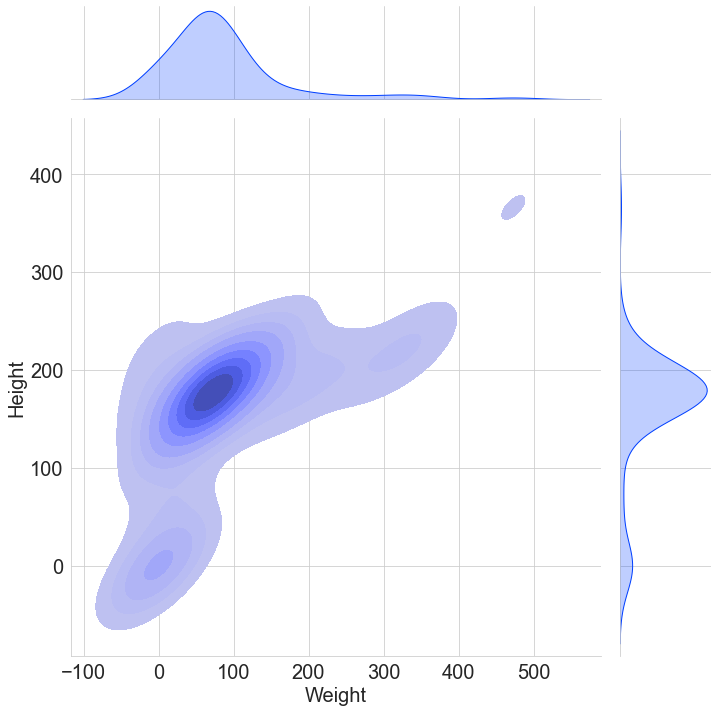

In [14]:
sns.jointplot(animalattributes_hero_prop.Weight, animalattributes_hero_prop.Height,
              animalattributes_hero_prop, kind='kde', fill=True, height=10)
#plt.title("Height & Weight of heroes with Abilities")

Text(0.5, 0.98, 'Characteristics of Superheroes with Animal Attributes')

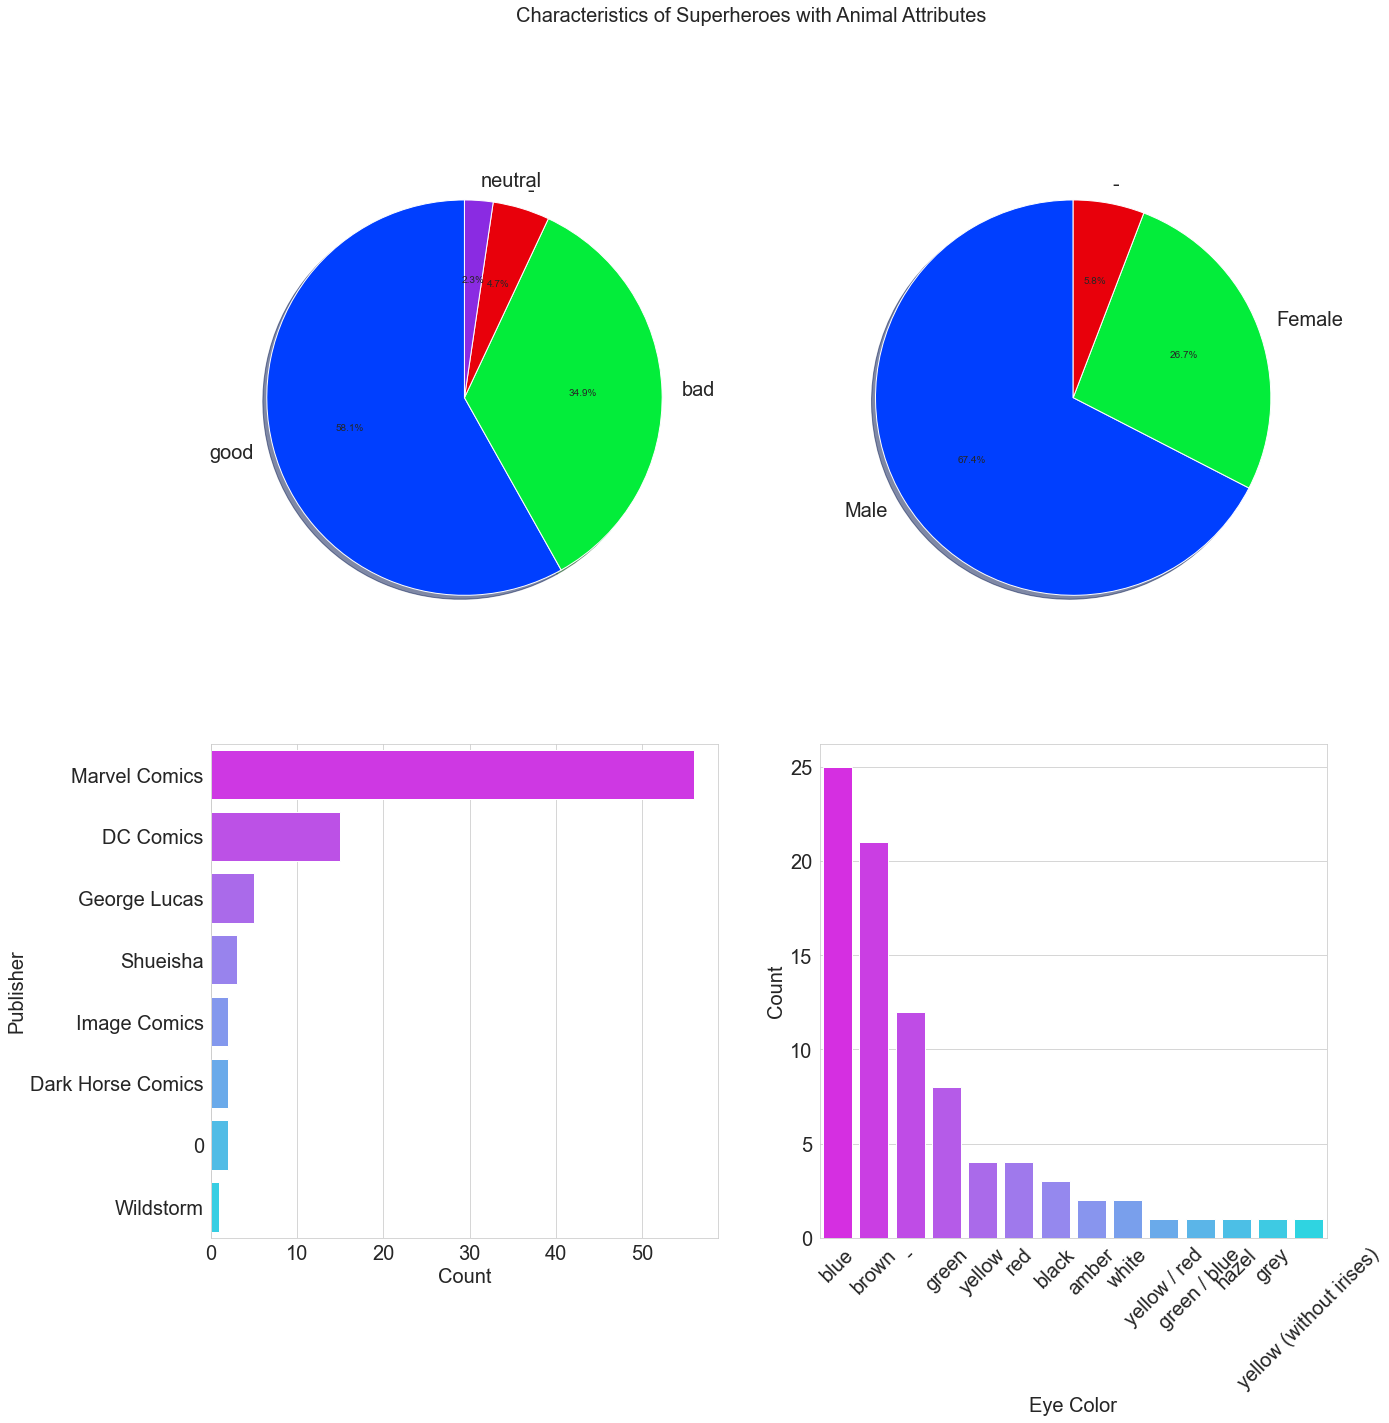

In [15]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)

x = ax[0][0].pie(list(animalattributes_hero_prop['Alignment'].value_counts()),
             labels=list(animalattributes_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
y = ax[0][1].pie(list(animalattributes_hero_prop['Gender'].value_counts()),
             labels=list(animalattributes_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(animalattributes_hero_prop.Publisher.value_counts()).reset_index(), palette="cool_r", 
            orient='h',ax=ax[1][0])

sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(animalattributes_hero_prop['Eye color'].value_counts()).reset_index(), palette="cool_r",
            ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characteristics of Superheroes with Animal Attributes")

### Observations: 🐺 Animal Attributes

- Most of these superheros heroes around **58%** fight for the **good** side.
- **Males** dominate this category.
- Most of the characters are from **Marvel Comics**.
- A diverse range of **Eye Colors** can be seen. 

<br><br>

## • 💪🏻 Power of Strength

c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


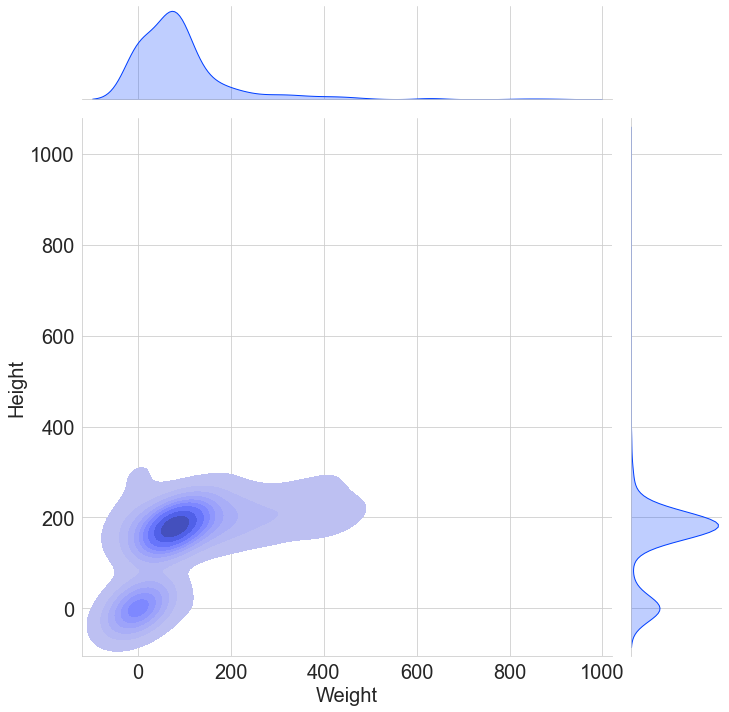

In [16]:
sns.jointplot(strength_hero_prop.Weight, strength_hero_prop.Height, fill=True,
              data=strength_hero_prop, kind='kde', height=10)

Text(0.5, 0.98, 'Characteristics of Superheroes with the Power of Strength')

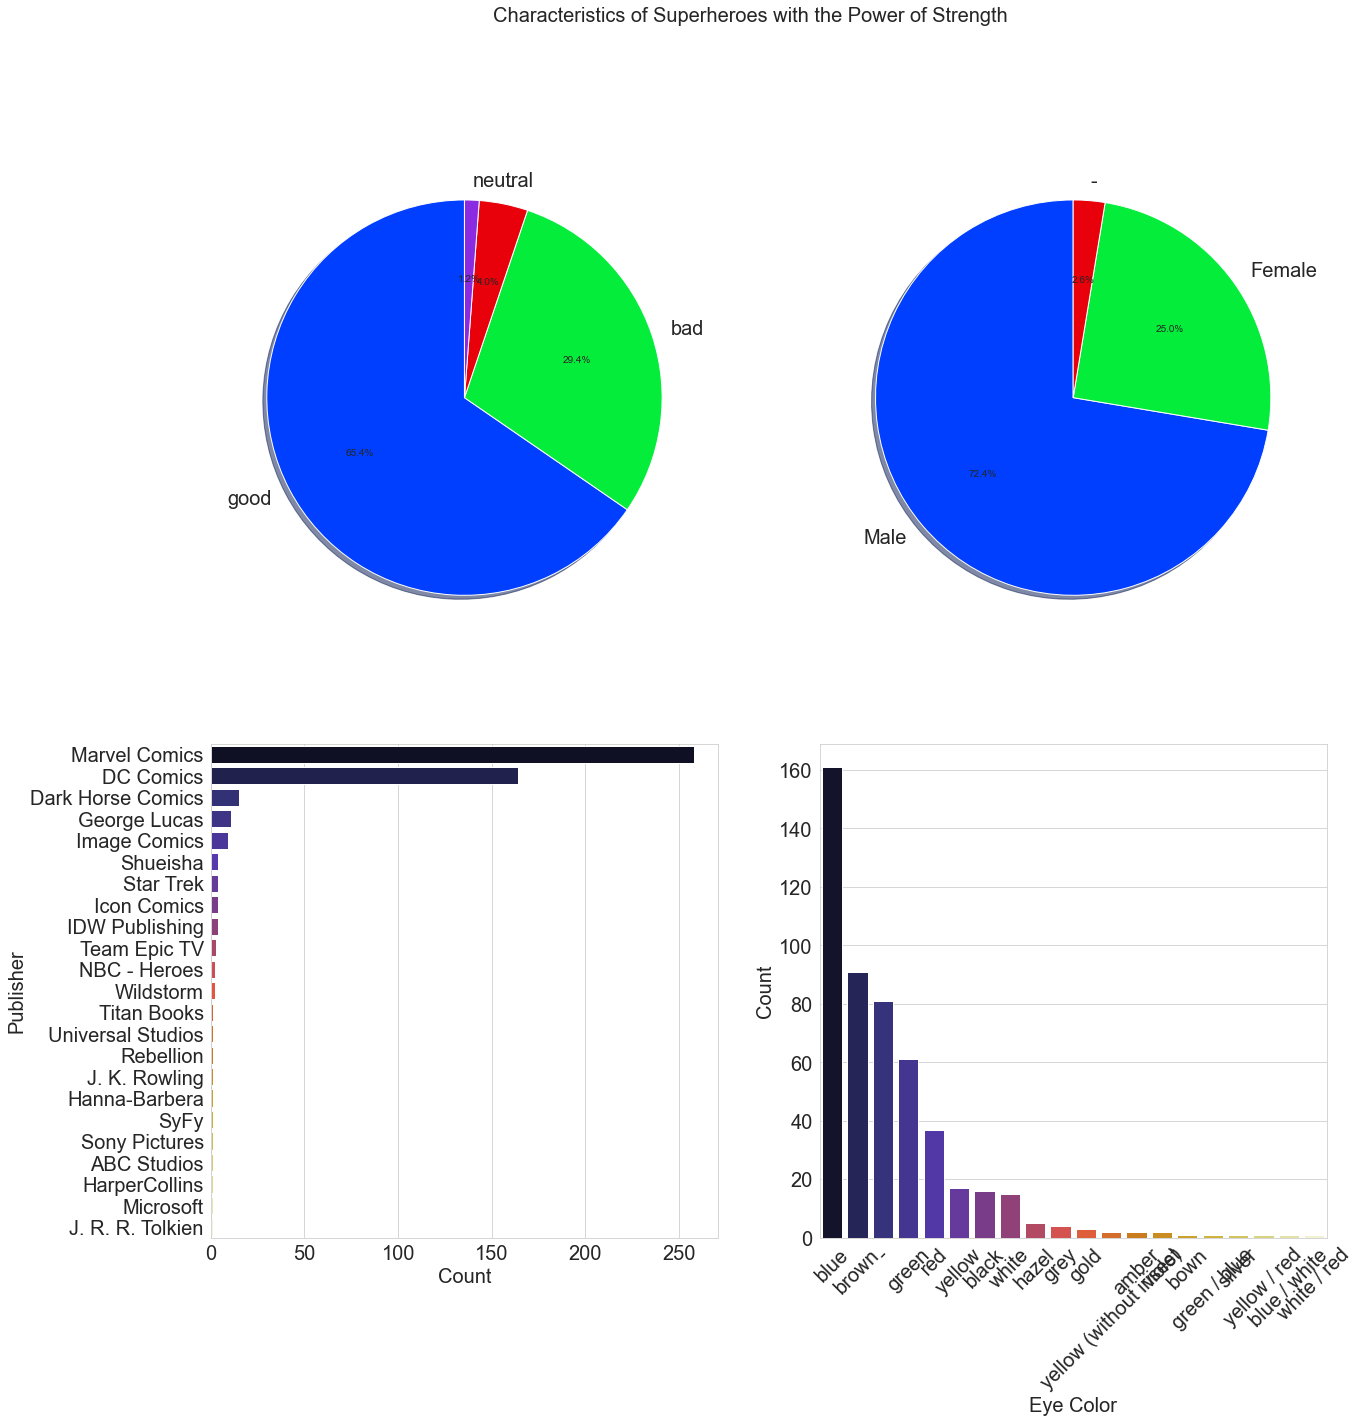

In [17]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)

x = ax[0][0].pie(list(strength_hero_prop['Alignment'].value_counts()),
             labels=list(strength_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

y = ax[0][1].pie(list(strength_hero_prop['Gender'].value_counts()),
             labels=list(strength_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(strength_hero_prop.Publisher.value_counts()).reset_index(), palette="CMRmap",
            orient='h',ax=ax[1][0])

sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(strength_hero_prop['Eye color'].value_counts()).reset_index(), palette="CMRmap",
            ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characteristics of Superheroes with the Power of Strength")

### Observations: 💪🏻 Power of Strength

- Most of these superheros heroes around **65%** fight for the **good** side.
- **Males** dominate this category.
- Most of the characters are from **Marvel Comics**.
- A diverse range of **Eye Colors** can be seen.

<br><br>

## • ⚡ Super Speed

c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


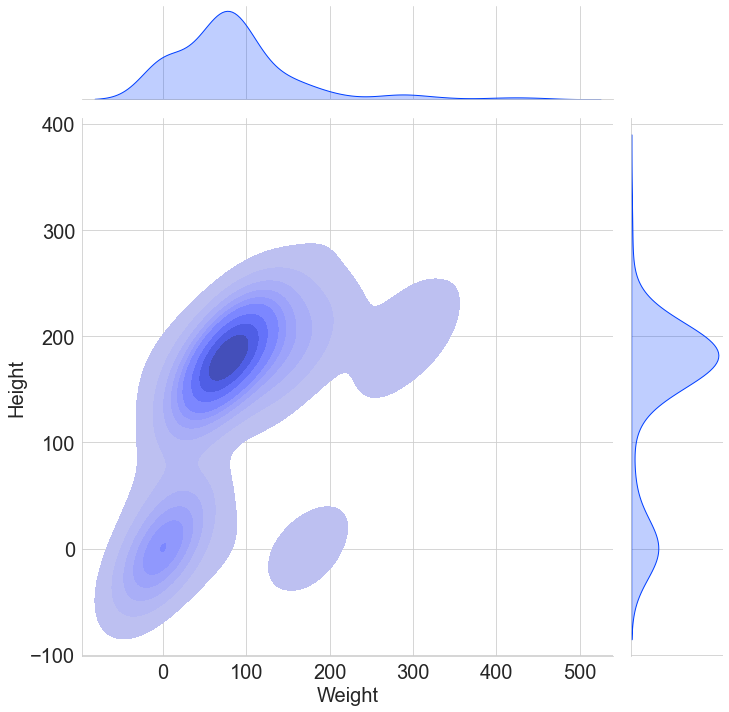

In [18]:
sns.jointplot(superspeed_hero_prop.Weight, superspeed_hero_prop.Height, fill=True,
              data=superspeed_hero_prop, kind='kde', height=10)

Text(0.5, 0.98, 'Characteristics of Superheroes with Super Speed')

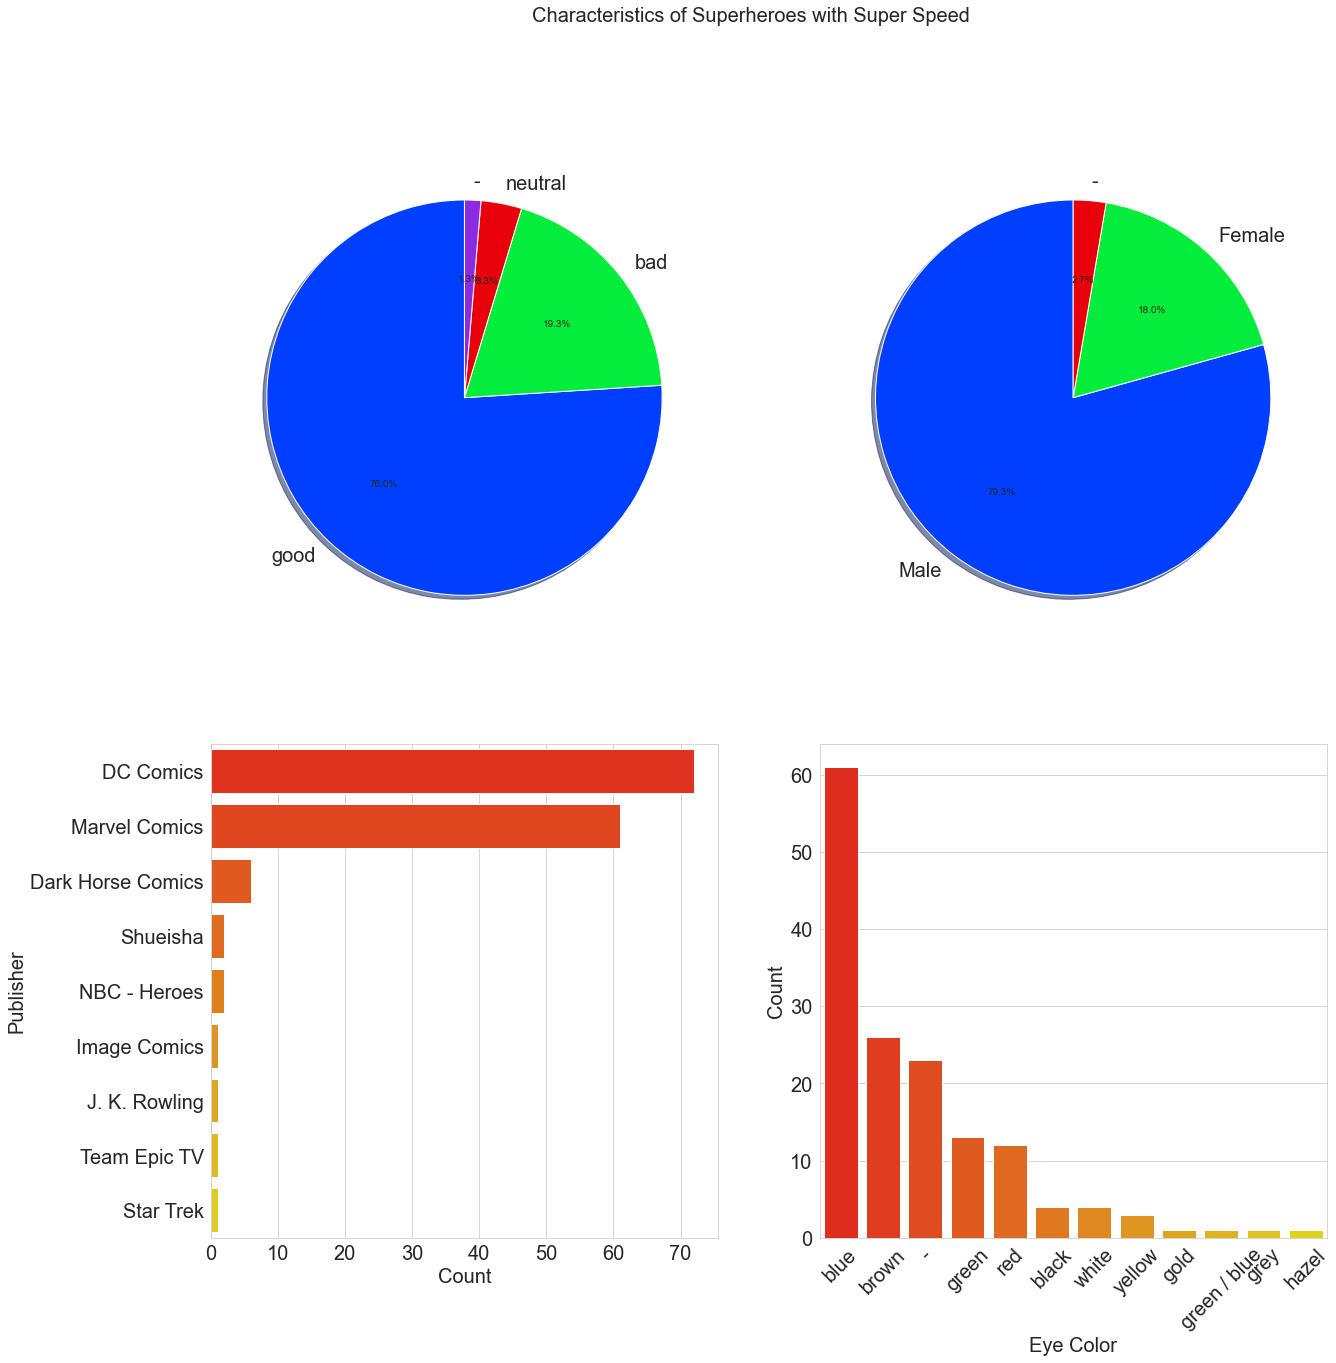

In [19]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)

x = ax[0][0].pie(list(superspeed_hero_prop['Alignment'].value_counts()),
             labels=list(superspeed_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

y = ax[0][1].pie(list(superspeed_hero_prop['Gender'].value_counts()),
             labels=list(superspeed_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(superspeed_hero_prop.Publisher.value_counts()).reset_index(), palette="autumn", 
            orient='h',ax=ax[1][0])

sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(superspeed_hero_prop['Eye color'].value_counts()).reset_index(), palette="autumn",
            ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characteristics of Superheroes with Super Speed")

### Observations: ⚡ Super Speed

- Most of these are good superheroes with a majority of more than **75%**. 
- **Males** dominate this category.
- **DC Comics**leads this category but **Marvel Comics** isn't very far behind.
- A diverse range of **Eye Colors** can be seen.

<br><br>

## • 👀 Vision Related Powers

c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


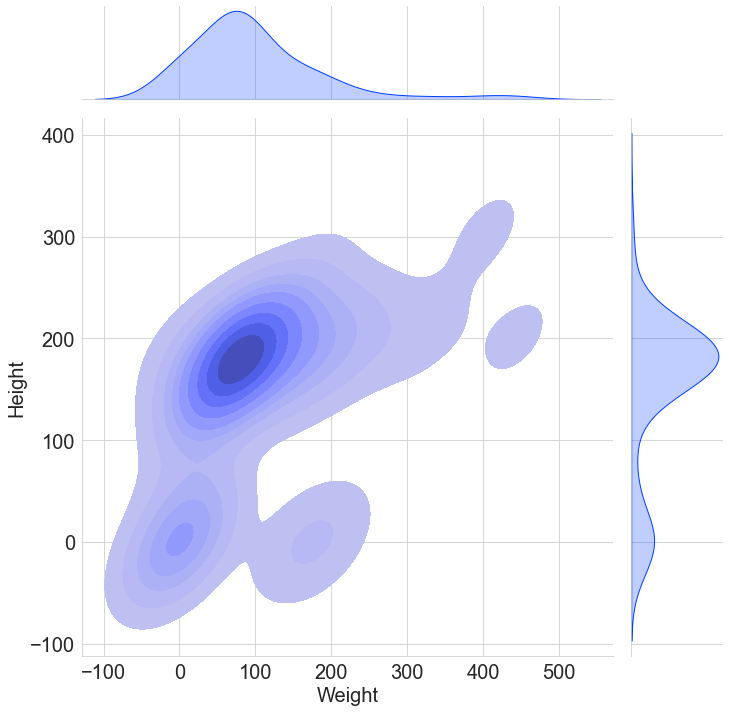

In [20]:
sns.jointplot(vision_hero_prop.Weight, vision_hero_prop.Height, fill=True,
              data=vision_hero_prop, kind='kde', height=10)

Text(0.5, 0.98, 'characteristics of Superheroes with Vision Related Super Powers')

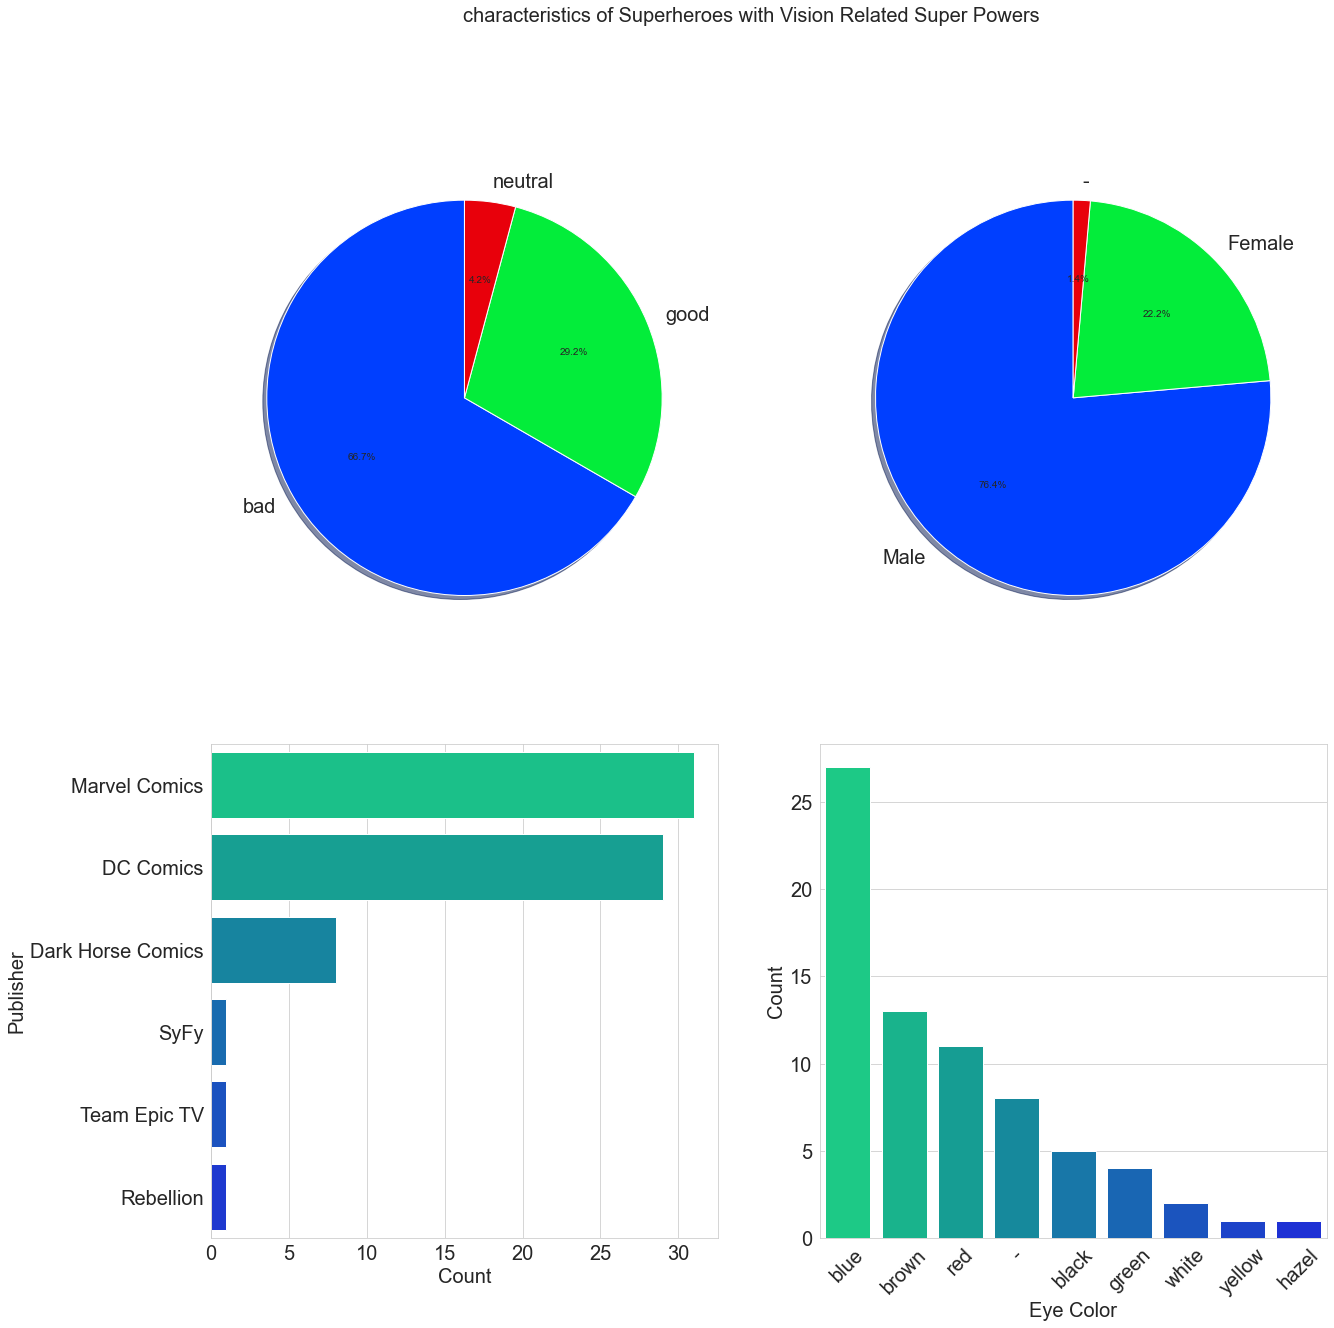

In [21]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)

x = ax[0][0].pie(list(vision_hero_prop['Alignment'].value_counts()),
             labels=list(vision_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

y = ax[0][1].pie(list(vision_hero_prop['Gender'].value_counts()),
             labels=list(vision_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)

sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(vision_hero_prop.Publisher.value_counts()).reset_index(), palette="winter_r", 
            orient='h',ax=ax[1][0])

sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(vision_hero_prop['Eye color'].value_counts()).reset_index(), palette="winter_r", 
            ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("characteristics of Superheroes with Vision Related Super Powers")

### Observations: 👀 Vision Related Powers 

- Here, Majority are **bad**/Supervillans, almost **66%**.
- About **75%** are males.
- **Marvel Comics** and **DC** are head to head in this category with a big lead.
- A diverse range of **Eye Colors** can be seen here as well although not as much as above.

<br>

--------

<br>

<img align="center" src="https://github.com/GarethSequeira/Superhero-Analysis/blob/main/SuperheroAnalysis/Images/TheEndRect.png?raw=true" width="50%">  